In [ ]:
#import and processing data

In [2]:
import pandas as pd
df = pd.read_csv('bank.csv',sep=';',header=0)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [3]:
import matplotlib.pyplot as plt
import numpy as np
df.dropna(axis=0)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
job_mapping = {'admin.': 1,'unknown': 2,'unemployed': 3,'management': 4,'housemaid': 5,'entrepreneur': 6,'student': 7,
                                       'blue-collar': 8,'self-employed': 9,'retired': 10,'technician': 11,'services': 12}

df['job'] = df['job'].map(job_mapping)

In [5]:
marital_mapping = {'married': 1,'divorced': 2,'single': 3}

df['marital'] = df['marital'].map(marital_mapping)

In [6]:
education_mapping = {'unknown': 1,'secondary': 2,'primary': 3,'tertiary': 4}
df['education'] = df['education'].map(education_mapping)

In [7]:
default_mapping = {'no': 0,'yes': 1}
df['default'] = df['default'].map(default_mapping)
y_mapping={'no': 0,'yes': 1}
df['y'] = df['y'].map(y_mapping)

In [8]:
# perception method

In [9]:
# choose age and default as independent variable and y as dependent variable
from sklearn.model_selection import train_test_split

X = df.iloc[:, [0,4]]
y = df.iloc[:, 16]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [4000  521]
Labels counts in y_train: [2999  391]
Labels counts in y_test: [1001  130]


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)

In [12]:
#accuracy and plot
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


Accuracy: 0.89


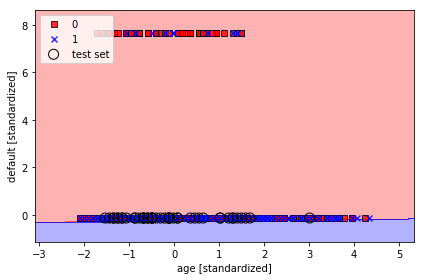

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('age [standardized]')
plt.ylabel('default [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
# choose job and default as independent variable and y as dependent variable
from sklearn.model_selection import train_test_split

X3 = df.iloc[:, [2,4]]
y3 = df.iloc[:, 16]

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.25, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y3))
print('Labels counts in y_train:', np.bincount(y3_train))
print('Labels counts in y_test:', np.bincount(y3_test))

Labels counts in y: [4000  521]
Labels counts in y_train: [2999  391]
Labels counts in y_test: [1001  130]


In [16]:
sc = StandardScaler()
sc.fit(X3_train)
X3_train_std = sc.transform(X3_train)
X3_test_std = sc.transform(X3_test)

In [17]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X3_train_std, y3_train)
y3_pred = ppn.predict(X3_test_std)

In [18]:
#accuracy and plot
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y3_test, y3_pred))
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X3, y3, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
    x2_min, x2_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y3)):
        plt.scatter(x=X3[y3 == cl, 0], 
                    y=X3[y3 == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X3_test, y3_test = X3[test_idx, :], y3[test_idx]

        plt.scatter(X3_test[:, 0],
                    X3_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Accuracy: 0.89


In [21]:
#same accuracy as before

In [ ]:
# logistic regression

In [32]:
# choose education and duration as independent variable and y as dependent variable
from sklearn.model_selection import train_test_split

X1 = df.iloc[:, [3,11]]
y1 = df.iloc[:, 16]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y1:', np.bincount(y1))
print('Labels counts in y1_train:', np.bincount(y1_train))
print('Labels counts in y1_test:', np.bincount(y1_test))

Labels counts in y1: [4000  521]
Labels counts in y1_train: [2799  365]
Labels counts in y1_test: [1201  156]


In [33]:
sc = StandardScaler()
sc.fit(X1_train)
X1_train_std = sc.transform(X1_train)
X1_test_std = sc.transform(X1_test)

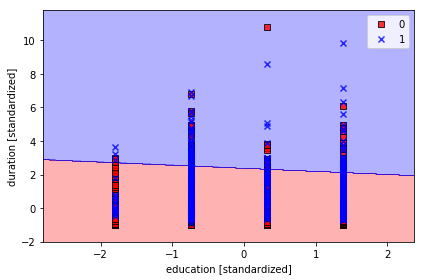

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X1_train_std, y1_train)

X1_combined_std = np.vstack((X1_train_std, X1_test_std))
y1_combined = np.hstack((y1_train, y1_test))
plot_decision_regions(X1_combined_std, y1_combined,
                      classifier=lr)
# plot_decision_regions(X=X1_test_std, y=y1_test, classifier=lr)
plt.xlabel('education [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [36]:
y1_pred = lr.predict(X1_test_std)
print('Misclassified samples: %d' % (y1_test != y1_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y1_test, y1_pred))

Misclassified samples: 151
Accuracy: 0.89


In [ ]:
# SVM method

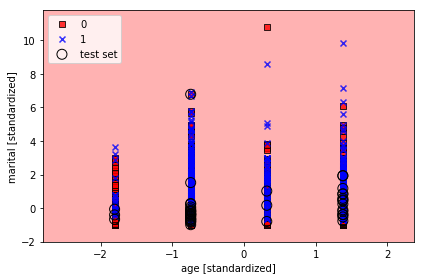

In [40]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X1_train_std, y1_train)

plot_decision_regions(X1_combined_std, 
                      y1_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('education [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# using marital and age as independent variables and y as dependent variable
X2 = df.iloc[:, [0, 2]]
y2 = df.iloc[:, 16]
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=1, stratify=y)
sc.fit(X2_train)
X2_train_std = sc.transform(X2_train)
X2_test_std = sc.transform(X2_test)


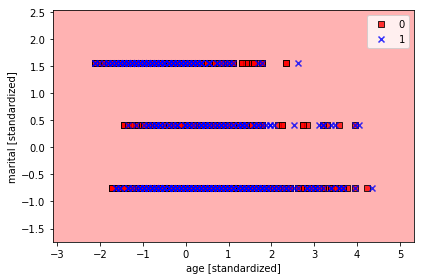

In [45]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X2_train_std, y2_train)

X2_combined_std = np.vstack((X2_train_std, X2_test_std))
y2_combined = np.hstack((y2_train, y2_test))

plot_decision_regions(X2_combined_std, y2_combined,
                      classifier=svm)
plt.xlabel('age [standardized]')
plt.ylabel('marital [standardized]')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()

In [46]:
y2_pred = svm.predict(X2_test_std)
print('Misclassified samples: %d' % (y2_test != y2_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y2_test, y2_pred))

Misclassified samples: 156
Accuracy: 0.89


In [ ]:
# decision tree

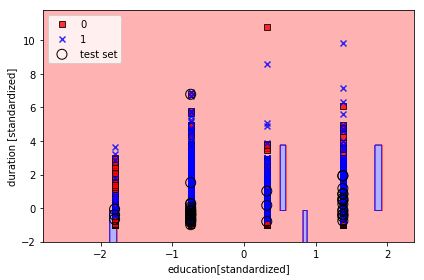

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X1_combined_std, y1_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('education[standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

In [50]:
y10_pred = knn.predict(X1_test_std)
print('Misclassified samples: %d' % (y1_test != y10_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y1_test, y10_pred))

Misclassified samples: 185
Accuracy: 0.86
